### Data load and preparation

In [8]:
library('magrittr')
source("BulletGraph.R", local=TRUE)

# load birth rate data
birthrate <- read.csv('ex6-2/birth-rate.csv')

# load crime data
crime <- read.csv('ex6-2/crimeratesbystate-formatted.csv') 

# load education data
education <- read.csv('ex6-2/education.csv') 

# check column names
colnames(birthrate)

[1] "Country" "X1960"   "X1961"   "X1962"   "X1963"   "X1964"   "X1965"  
 [8] "X1966"   "X1967"   "X1968"   "X1969"   "X1970"   "X1971"   "X1972"  
[15] "X1973"   "X1974"   "X1975"   "X1976"   "X1977"   "X1978"   "X1979"  
[22] "X1980"   "X1981"   "X1982"   "X1983"   "X1984"   "X1985"   "X1986"  
[29] "X1987"   "X1988"   "X1989"   "X1990"   "X1991"   "X1992"   "X1993"  
[36] "X1994"   "X1995"   "X1996"   "X1997"   "X1998"   "X1999"   "X2000"  
[43] "X2001"   "X2002"   "X2003"   "X2004"   "X2005"   "X2006"   "X2007"  
[50] "X2008"

In [2]:
# format year columns
colnames(birthrate) <- gsub("X", "", colnames(birthrate))

# check column names
colnames(birthrate)

[1] "Country" "1960"    "1961"    "1962"    "1963"    "1964"    "1965"   
 [8] "1966"    "1967"    "1968"    "1969"    "1970"    "1971"    "1972"   
[15] "1973"    "1974"    "1975"    "1976"    "1977"    "1978"    "1979"   
[22] "1980"    "1981"    "1982"    "1983"    "1984"    "1985"    "1986"   
[29] "1987"    "1988"    "1989"    "1990"    "1991"    "1992"    "1993"   
[36] "1994"    "1995"    "1996"    "1997"    "1998"    "1999"    "2000"   
[43] "2001"    "2002"    "2003"    "2004"    "2005"    "2006"    "2007"   
[50] "2008"

### Histogram

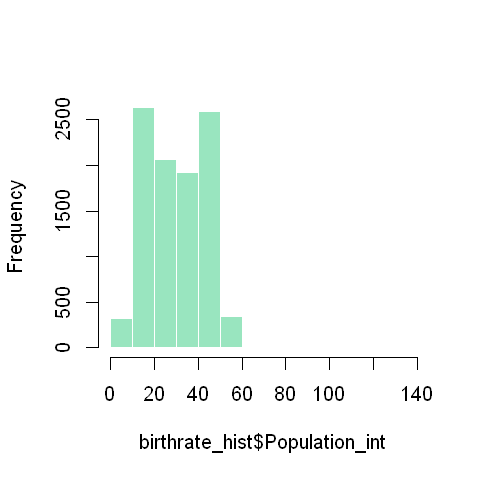

In [5]:
options(repr.plot.width = 4, repr.plot.height = 4)

# create pivotted data for plotting
birthrate_hist <- reshape2::melt(birthrate, id=c("Country")) %>%
  dplyr::mutate("Country" = as.character(Country),
                "Year" = as.character(variable),
                "Population" = value,
                "Population_int" = ceiling(value)) %>% 
  dplyr::select(c("Country","Year","Population", "Population_int"))

# create histogram of population data
hist(birthrate_hist$Population_int, col=rgb(0.2,0.8,0.5,0.5) , border=F , main="")

### Box plot

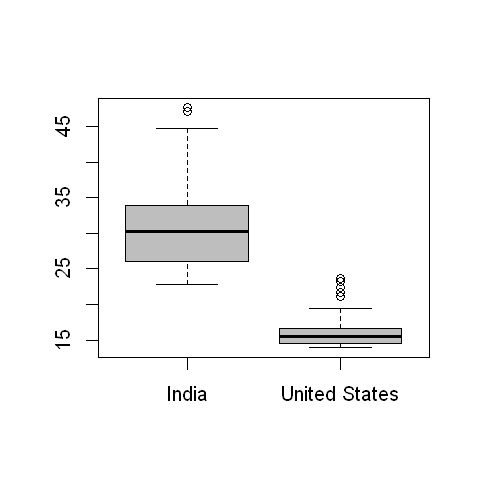

In [6]:
# create box plot of population data
birthrate_box <- birthrate_hist %>% 
  dplyr::filter(Country %in% c("United States", "India"))

boxplot(birthrate_box$Population ~ birthrate_box$Country , col="grey")

### Bullet chart

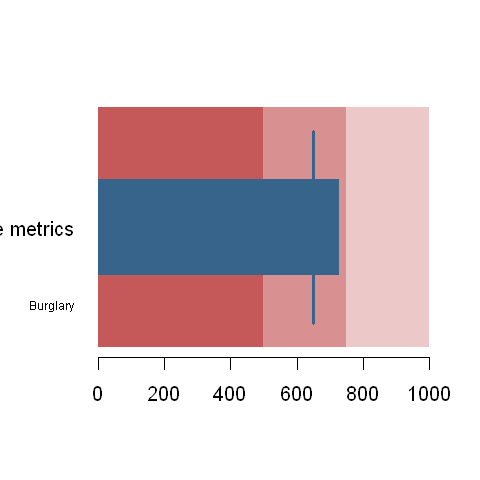

In [9]:
# create bullet chart with crime data
crime_bullet <- crime %>% 
  dplyr::filter(stringr::str_trim(state, "both") == "United States") %>% 
  dplyr::select(c(state, burglary))

bulletgraph(x=crime_bullet$burglary,ref=650,limits=c(0,500,750,1000),
            name= "USA Crime metrics",subname="Burglary",
            col="steelblue4",shades="firebrick")

### Donut chart

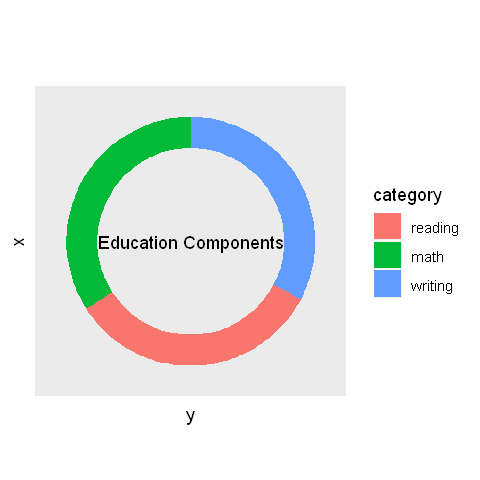

In [10]:
# donut chart using USA crime data
education_donut <- education %>% 
  dplyr::filter(stringr::str_trim(state, "both") == "United States") %>% 
  reshape2::melt(id=c("state")) %>% 
  dplyr::rename("category" = variable) %>% 
  dplyr::filter(category %in% c("reading","math","writing")) %>% 
  dplyr::select(-state)

# add addition columns, needed for drawing with geom_rect
education_donut$fraction = education_donut$value / sum(education_donut$value)
education_donut = education_donut[order(education_donut$fraction), ]
education_donut$ymax = cumsum(education_donut$fraction)
education_donut$ymin = c(0, head(education_donut$ymax, n=-1))

# make the plot
ggplot2::ggplot(education_donut, ggplot2::aes(fill=category, ymax=ymax, ymin=ymin, xmax=4, xmin=3)) +
  ggplot2::geom_rect() +
  ggplot2::coord_polar(theta="y") +
  ggplot2::xlim(c(0, 4)) +
  ggplot2::theme(panel.grid=ggplot2::element_blank()) +
  ggplot2::theme(axis.text=ggplot2::element_blank()) +
  ggplot2::theme(axis.ticks=ggplot2::element_blank()) +
  ggplot2::annotate("text", x = 0, y = 0, label = "Education Components") +
  ggplot2::labs(title="")

### Pie chart

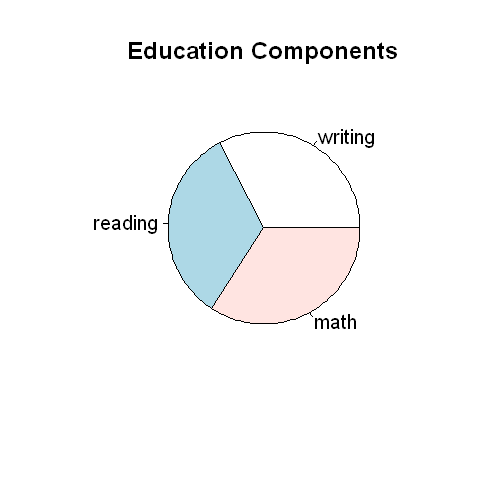

In [11]:
# pie chart
slices <- education_donut$value
lbls <- education_donut$category
pie(slices, labels = lbls, main="Education Components")

### Parallel plot

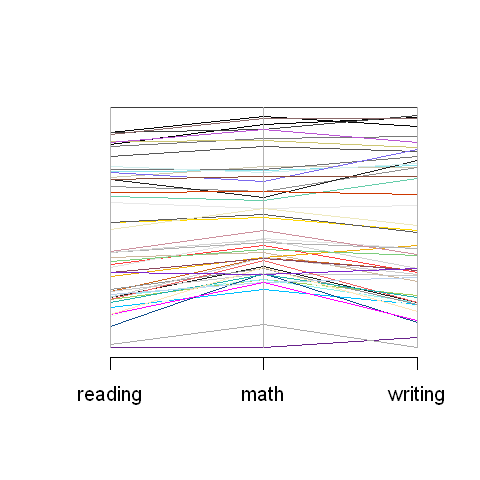

In [12]:
# parallel plot
education_parallel <- education %>% 
  dplyr::filter(stringr::str_trim(state, "both") != "United States")

# vector color
my_colors=colors()[as.numeric(education_parallel$state)*11]

# make the graph
MASS::parcoord(education_parallel[,c(2:4)] , col= my_colors  )